In [1]:
#%pip install lyricsgenius

In [2]:
import lyricsgenius as lg
import pandas as pd
import matplotlib.pyplot as plt

## Data wrangling:
The final data frame **top10\_df** contains top 10 songs per year, sorted by **'Weeks on Chart'**, i.e. the number of weeks they've been on the Billboard chart.

In [3]:
df = pd.read_csv('billboard.csv')
df['Year'] = pd.to_datetime(df['WeekID']).dt.year
df = df.rename(columns={"Week Position":"WeekPosition"})
df = df.drop_duplicates(['SongID'])
df.head()

,url,WeekID,WeekPosition,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,Bill Anderson,StillBill Anderson,1.0,17.0,11.0,8.0,1963
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,Bobby Vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0,1967
2,http://www.billboard.com/charts/hot-100/1971-0...,7/3/1971,11,She's Not Just Another Woman,The 8th Day,She's Not Just Another WomanThe 8th Day,1.0,17.0,11.0,8.0,1971
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,Bay City Rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0,1975
4,http://www.billboard.com/charts/hot-100/1979-0...,9/29/1979,11,Pop Muzik,M,Pop MuzikM,1.0,17.0,11.0,8.0,1979


In [4]:
df = df.sort_values(by='Weeks on Chart', ascending=False)
top10_df = df.groupby('Year').head(10)
top10_df = top10_df[['Song', 'Performer', 'Year']]
top10_df['Decade'] = (top10_df['Year']//10)*10
top10_df.head()

,Song,Performer,Year,Decade
167831,Eastside,"benny blanco, Halsey & Khalid",2019,2010
252653,Wait For You,Elliott Yamin,2007,2000
271215,Wildflower,Skylark,1973,1970
177187,Even Though I'm Leaving,Luke Combs,2019,2010
315541,Do Re Mi,blackbear,2017,2010


In [5]:
print("Total number of songs: ",len(top10_df))

Total number of songs:  630


(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]),
 array([1958.        , 1958.98412698, 1959.96825397, 1960.95238095,
        1961.93650794, 1962.92063492, 1963.9047619 , 1964.88888889,
        1965.87301587, 1966.85714286, 1967.84126984, 1968.82539683,
        1969.80952381, 1970.79365079, 1971.77777778, 1972.76190476,
        1973.74603175, 1974.73015873, 1975.71428571, 1976.6984127 ,
        1977.68253968, 1978.66666667, 1979.65079365, 1980.63492063,
        1981.61904762, 1982.6031746 , 1983.58730159, 1984.57142857,
        1985.55555556, 1986.53968254, 1987.52380952, 1988.50793651,
        1989.49206349, 1990.47619048, 1991.46031746, 1992.44444444,
        1993.42857143, 1994.412

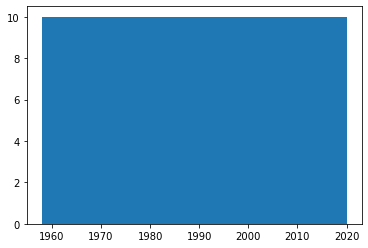

In [6]:
plt.hist(x=top10_df.Year, bins= 63)

## Lyrics scraping:
We get the lyrics for the top_10 songs from Genius API.

In [7]:
def update_performer(performer):
    try:
        if performer.find("duet with") > 0:
            performer = performer.split("duet with", 1)[0] #take the performer_1 in "performer_1 duet with performer_2"
        elif performer.find("with") > 0:
            performer = performer.split("with", 1)[0] #take the performer_1 in "performer_1 with performer_2"
        elif performer.find("and") > 0:
            performer = performer.split("and", 1)[0]
        elif performer.find("&") > 0:
            performer = performer.split("&", 1)[0]
        elif performer.find("featuring") > 0:
            performer = performer.split("featuring", 1)[0]
        elif performer.find("feat") > 0:
            performer = performer.split("feat", 1)[0]
    except:
        print("Error:", performer)
        
    return performer

In [8]:
top10_df['Performer'] = top10_df['Performer'].str.lower()

top10_df['Performer'] = top10_df.apply(lambda x: update_performer(x['Performer']), axis=1)

We save the lyrics of each song in a column **Lyrics**.

In [9]:
token = 'YNC0he1dkhkOGGkyYFyVdN1wtSCECP2lczJEfHR0BEG2vYqGKALY6urSvymgAEvJ'

genius = lg.Genius(token, 
                   skip_non_songs=True, excluded_terms=["(Remix)", "(Live)"], 
                   remove_section_headers=True) #ignore metadata

In [10]:
"""
@params: a song title and the performer's name
@return: the lyrics, or "Error" in case of exception
"""
def get_lyrics(song, performer):
    try:
        return genius.search_song(song, performer).lyrics
    except: 
        return "Error"

In [11]:
top10_df['Lyrics'] = top10_df.apply(lambda x: get_lyrics(x['Song'],x['Performer']), axis=1)

Searching for "Eastside" by benny blanco, halsey ...
Done.
Searching for "Wait For You" by elliott yamin...
Done.
Searching for "Wildflower" by skylark...
Done.
Searching for "Even Though I'm Leaving" by luke combs...
Done.
Searching for "Do Re Mi" by blackbear...
Done.
Searching for "You Make It Easy" by jason aldean...
Done.
Searching for "Smack That" by akon ...
Done.
Searching for "Alley-Oop" by hollywood argyles...
Done.
Searching for "Quiet Village" by the exotic sounds of martin denny...
Done.
Searching for "The Ballad Of The Green Berets" by ssgt barry sadler...
Done.
Searching for "Run This Town" by jay-z, rihanna ...
Done.
Searching for "Poor Side Of Town" by johnny rivers...
Done.
Searching for "Blue Moon" by the marcels...
Done.
Searching for "Burning Bridges" by jack scott...
Done.
Searching for "Take A Bow" by rihanna...
Done.
Searching for "Classical Gas" by mason williams...
Specified song does not contain lyrics. Rejecting.
Searching for "Suspicion" by terry stafford..

In [12]:
top10_df.query('Lyrics=="Error"')

,Song,Performer,Year,Decade,Lyrics
36994,Classical Gas,mason williams,1968,1960,Error
36892,Rainy Night In Georgia/Rubberneckin',brook benton,1970,1970,Error
36712,"Can't Help Falling In Love (From ""Sliver"")",ub40,1993,1990,Error
36771,Out Of Limits,the marketts,1964,1960,Error
36553,Panda,desiigner,2016,2010,Error
36561,Calcutta,lawrence welk,1961,1960,Error
38603,Because They're Young,duane eddy,1960,1960,Error
20571,Outa-Space,billy preston,1972,1970,Error
20570,Pipeline,chantay's,1963,1960,Error
20629,Don't Cry Daddy/Rubberneckin',elvis presley,1970,1970,Error


In [13]:
print("Total number of errors: ", len(top10_df.query('Lyrics=="Error"')))

Total number of errors:  24


The number of erronous lyrics is low, we can simply drop them.

In [14]:
top10_df = top10_df.drop(top10_df[top10_df.Lyrics=="Error"].index)

We save the final dataframe to a csv file.

In [20]:
out_file = open("data/lyrics.csv", "w")

top10_df.to_csv(out_file, index=False)